# Ways to visualize top count with atoti
\[_In case you’re unable to see the atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/main/notebooks/02-technical-tutorials/topcount/atoti.ipynb)._]

Given different categories of items, we will explore how to achieve the following with atoti:
- Visualize top 10 apps with the highest rating in table
- Visualize top 10 categories with most number of apps rated 5 in Pie chart
- Visualize top 10 apps for each category in subplots

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

__Note on data:__
We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover.png" alt="atoti table" /></a></div>

## Top count with atoti

In [1]:
import atoti as tt

session = tt.Session(user_content_storage="./content", port=55707)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.0,Everyone,"May 8, 2018",4.4 and up
The Weather Channel: Rain Forecast & Storm Alerts,WEATHER,Weather,Varies with device,4.4,1558437.0,NaN,50000000.0,Free,0.0,Everyone,"August 1, 2018",Varies with device
Weather Crave,WEATHER,Weather,6.1.3,4.2,133338.0,44000000.0,5000000.0,Free,0.0,Everyone,"June 26, 2018",4.1 and up
Weather,WEATHER,Weather,1.3.A.2.9,4.2,18773.0,12000000.0,10000000.0,Free,0.0,Everyone,"May 24, 2018",4.4 and up
FR Tides,WEATHER,Weather,6,3.8,1195.0,582000.0,100000.0,Free,0.0,Everyone,"February 16, 2014",2.1 and up


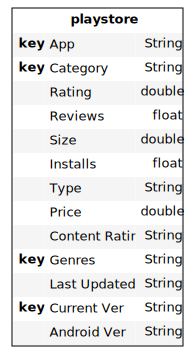

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
cube.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

In [4]:
session.visualize("Top 10 apps with highest rating across categories")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x0000025E45C93400>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x0000025E45C99760>, 'Size.SUM': <atoti.measure.Measure object at 0x0000025E45C99730>, 'Size.MEAN': <atoti.measure.Measure object at 0x0000025E45C997C0>, 'Reviews.SUM': <atoti.measure.Measure object at 0x0000025E45C99820>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x0000025E45C99850>, 'Installs.SUM': <atoti.measure.Measure object at 0x0000025E45C99880>, 'Installs.MEAN': <atoti.measure.Measure object at 0x0000025E45C998B0>, 'Rating.SUM': <atoti.measure.Measure object at 0x0000025E45C998E0>, 'Rating.MEAN': <atoti.measure.Measure object at 0x0000025E45C99910>, 'Price.SUM': <atoti.measure.Measure object at 0x0000025E45C99940>, 'Price.MEAN': <atoti.measure.Measure object at 0x0000025E45C99970>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(l["Category"], l["App"]),
)

We can drill down to different levels from category and the count is computed on the fly.

In [7]:
session.visualize("Categories with apps rated 5")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Apply top count filter from **atoti editor** on the category by the `Count with rating 5` measure. The atoti editor is the atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/atoti_editor.png" alt="a." width="50"> icon.

In [8]:
session.visualize("Top 10 categories with most number of apps rated 5")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`.  
In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CF78B0>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CF70A0>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEED90>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEEE50>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEED30>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEEA30>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEEA00>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEE940>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x0000025E45CEE0A0>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

In [10]:
session.visualize("Top 10 apps with highest rating for each category")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

#### Creating subplot to visualize top count per category

Again, go to the atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

In [11]:
session.visualize("Top 10 apps within each categories")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

You can use the filter to select the categories that you want to view.  
Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link(path="/#/dashboard/767")

Open the notebook in JupyterLab with the atoti extension enabled to see this link.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover-try.png" alt="atoti table" /></a></div>